<a href="https://colab.research.google.com/github/anyfish/IBM_HR_Analytics/blob/main/IBM_HR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IBM HR Analytics Employee Attrition & Performance

- [WebApp](https://modeloexamenmartinfarrera.herokuapp.com/)

- [GitHub](https://github.com/anyfish/IBM_HR_Analytics)

# Librerias

In [ ]:
# Conectar con Drive
from google.colab import drive
drive.mount('/content/dive')

Mounted at /content/dive


In [ ]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# Reducción de Dimensionalidad
from sklearn.decomposition import PCA

# División de DS
from sklearn.model_selection import train_test_split

# Modelos de ML
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

# Metricas de Precisión
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix

# Ajustes de Hiperparámetros
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Guardar Modelos
from joblib import dump, load

# Funciones Auxiliares

In [ ]:
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [ ]:
def remove_labels(df, label_name):
    X = df.drop(label_name, axis=1)
    y = df[label_name].copy()
    return (X, y)

# Datos

### Lectura

In [ ]:
df = pd.read_csv('/content/dive/MyDrive/Colab Notebooks/AI Lab/Examen/IBM HR/BD_IBM_HR-Employee.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


### **Caracteristicas en Escala**

- **Education:**
1 'Below College',
2 'College',
3 'Bachelor',
4 'Master',
5 'Doctor'

- **EnvironmentSatisfaction:**
1 'Low',
2 'Medium',
3 'High',
4 'Very High'

- **JobInvolvement:**
1 'Low',
2 'Medium',
3 'High',
4 'Very High'

- **JobSatisfaction:**
1 'Low',
2 'Medium',
3 'High',
4 'Very High',

- **PerformanceRating:**
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

- **RelationshipSatisfaction:**
1 'Low',
2 'Medium',
3 'High',
4 'Very High'

- **WorkLifeBalance:**
1 'Bad',
2 'Good',
3 'Better',
4 'Best'

## Distribución de Etiquetas

"Attrition" es la etiqueta en nuestro conjunto de datos y representa el si el empleado esta desgastado (en burnout).



In [ ]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

# Procesamiento

## Checkpoint

In [ ]:
df_p = df.copy()

## Información de Caracteristicas

In [ ]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Revisión de NA en Caracteristicas

In [ ]:
df_p.isna().any().value_counts() - len(df_p.columns)

False    0
dtype: int64

## Revisión de Valores Infinitos en Caracteristicas

In [ ]:
df_p.isin([np.inf, - np.inf]).any().value_counts() - len(df_p.columns)

False    0
dtype: int64

## Revision Categorias del Tipo Objeto

In [ ]:
col_obj = df_p.select_dtypes(include='object').columns
col_obj

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [ ]:
for i in col_obj:
  count = df_p[i].value_counts()
  print(f"{i}:\n{count},\n")

Attrition:
No     1233
Yes     237
Name: Attrition, dtype: int64,

BusinessTravel:
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64,

Department:
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64,

EducationField:
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64,

Gender:
Male      882
Female    588
Name: Gender, dtype: int64,

JobRole:
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64,

MaritalStatus:
Married     673
Single      470
Divorced    327
Name: 

# Transformación

### Checkpoint

In [ ]:
df_t = df.copy()

### Eliminar Categorias Innecesarias

Se decide eliminar la caracteristica "Over18", "EmployeeNumber" y "EmployeeCount" ya que no aporta nada información relevante al analisis

In [ ]:
df_t = df_t.drop(['Over18', 'EmployeeNumber','EmployeeCount'], axis=1)

In [ ]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

### Codifición de Caracteristicas Categoricas

In [ ]:
col = df_t.select_dtypes(include='object').columns
col = col.drop('Attrition')

df_t = pd.get_dummies(df_t, columns=col, drop_first=True, prefix_sep='_')

In [ ]:
df_t

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,Yes,1102,1,2,2,94,3,2,4,...,0,0,0,0,0,1,0,0,1,1
1,49,No,279,8,1,3,61,2,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,Yes,1373,2,2,4,92,2,1,3,...,1,0,0,0,0,0,0,0,1,1
3,33,No,1392,3,4,4,56,3,1,3,...,0,0,0,0,1,0,0,1,0,1
4,27,No,591,2,1,1,40,3,1,2,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,884,23,2,3,41,4,2,4,...,1,0,0,0,0,0,0,1,0,0
1466,39,No,613,6,1,4,42,2,3,1,...,0,0,0,0,0,0,0,1,0,0
1467,27,No,155,4,3,2,87,4,2,2,...,0,0,1,0,0,0,0,1,0,1
1468,49,No,1023,2,3,4,63,2,2,2,...,0,0,0,0,0,1,0,1,0,0


In [ ]:
df_t.select_dtypes(include='object').columns

Index(['Attrition'], dtype='object')

### Reducción de Dimensionalidad (PCA)



In [ ]:
X_df = df_t.drop(['Attrition'], axis=1)

pca = PCA(n_components=2)
df_pca = pca.fit_transform(X_df)

In [ ]:
df_pca = pd.DataFrame(df_pca, columns=['c1','c2'])

In [ ]:
df_reduce = pd.concat([df_pca, pd.DataFrame(df_t['Attrition'])], axis=1)
df_reduce

,c1,c2,Attrition
0,5140.212506,-720.188070,Yes
1,10529.933559,-1804.774783,No
2,-12088.374978,-3922.184159,Yes
3,8690.683175,-3951.631690,No
4,2193.417522,-3127.274475,No
...,...,...,...
1465,-2182.111503,-3845.964758,No
1466,7280.699915,3193.299607,No
1467,-9145.030680,11.971981,No
1468,-1115.052988,-1068.100394,No


#### Resultado

Después de la Redución de Dimensionalidad se preservó la varianza para cada caracteristics del DS en un 100%.

In [ ]:
pca.explained_variance_ratio_

array([0.69475039, 0.30301245])

# Analisis

## Checkpoint

In [ ]:
df_a = df_t.copy()

## Matriz de Correlación

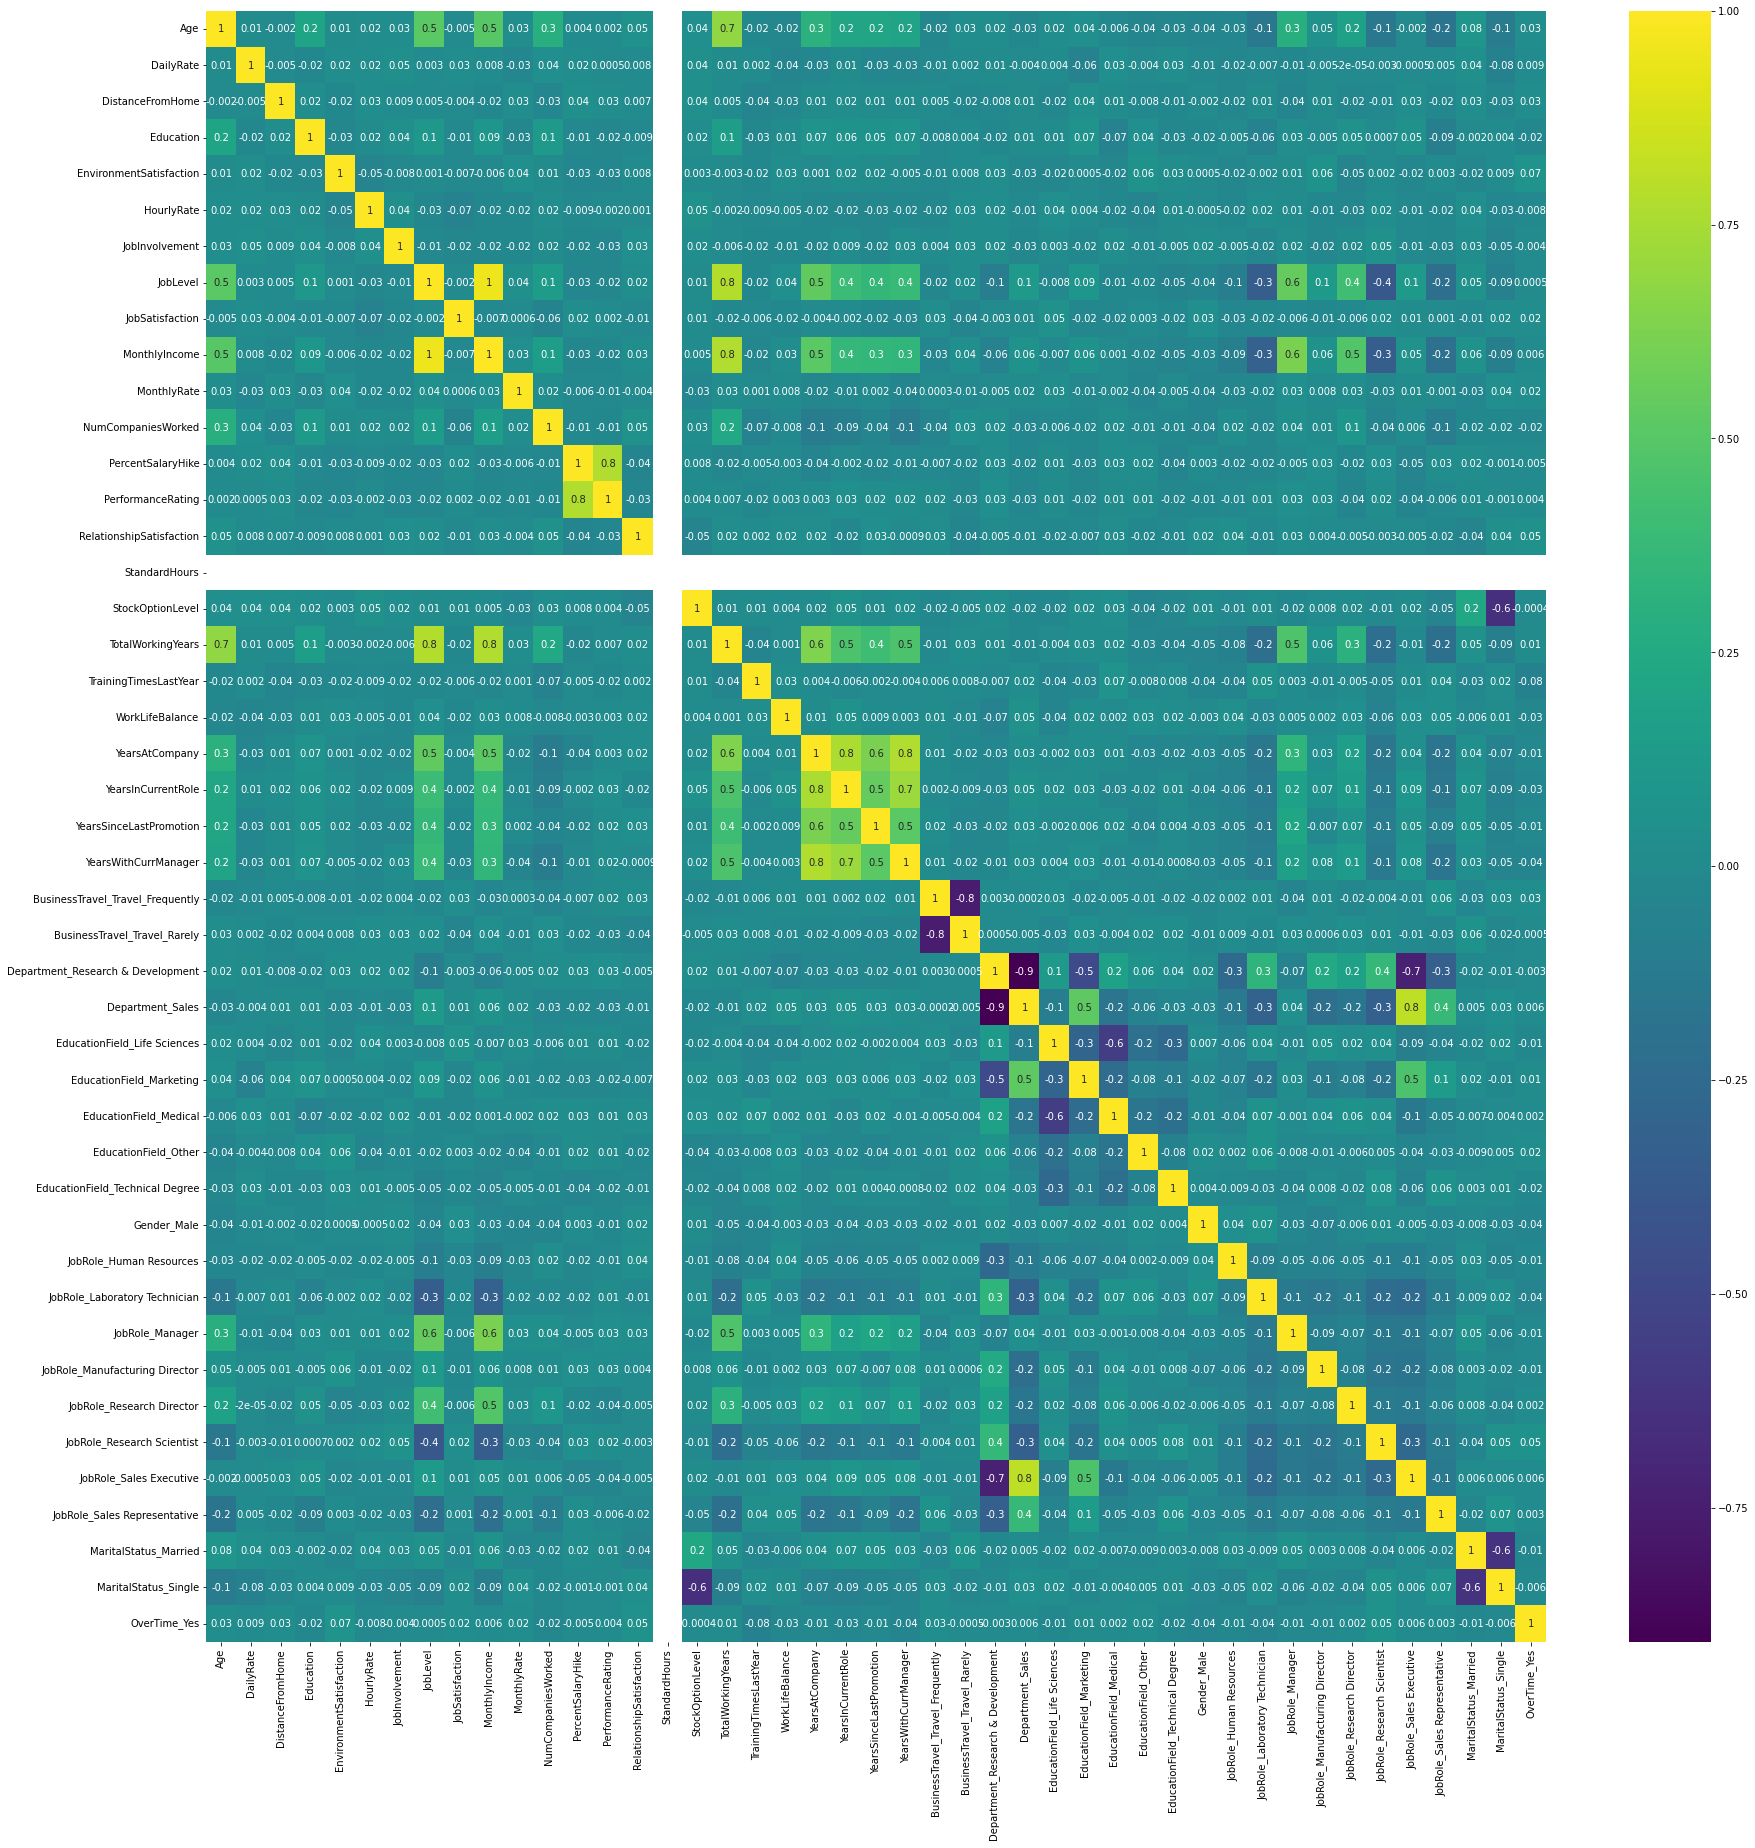

In [ ]:
plt.subplots(figsize=(30,30))
sns.heatmap(df_a.corr(), annot=True, fmt='.1g', cmap='viridis', cbar=True)

## Representación Grafica de Caracteristicas

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

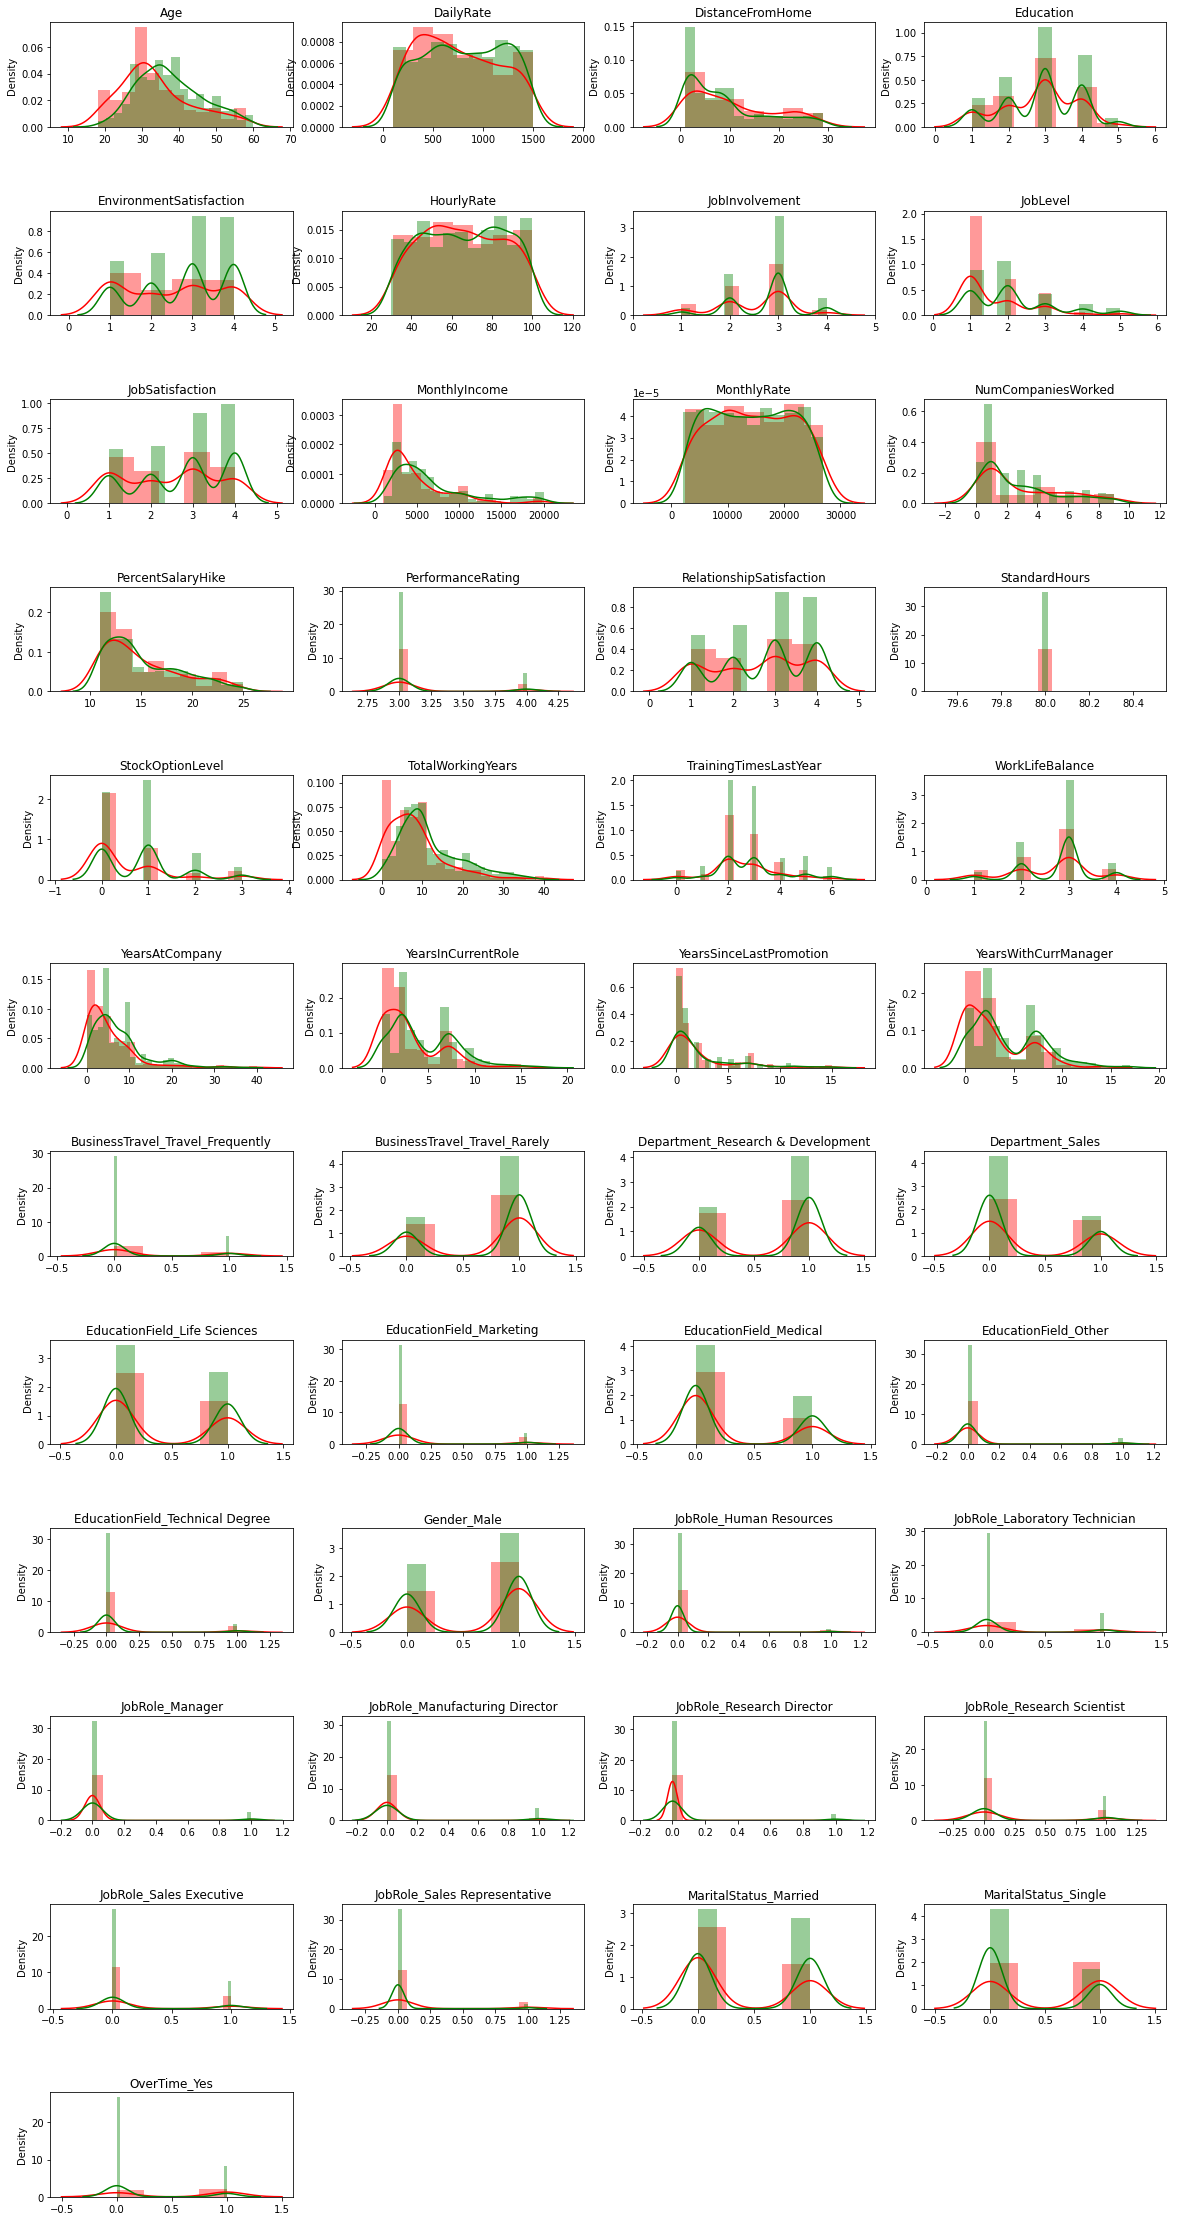

In [ ]:
caracteristicas = df_a.drop('Attrition', axis=1)

plt.figure(figsize=(20,40))
gs = gridspec.GridSpec(12,4)
gs.update(hspace=0.8)

for i, f in enumerate(caracteristicas):
    ax = plt.subplot(gs[i])
    sns.distplot(df_a[f][df_a["Attrition"] == "Yes"], color='r')
    sns.distplot(df_a[f][df_a["Attrition"] == "No"], color='g')
    ax.set_xlabel('')
    ax.set_title(str(f))

plt.show()

## Representación Grafica de Distribución de Datos

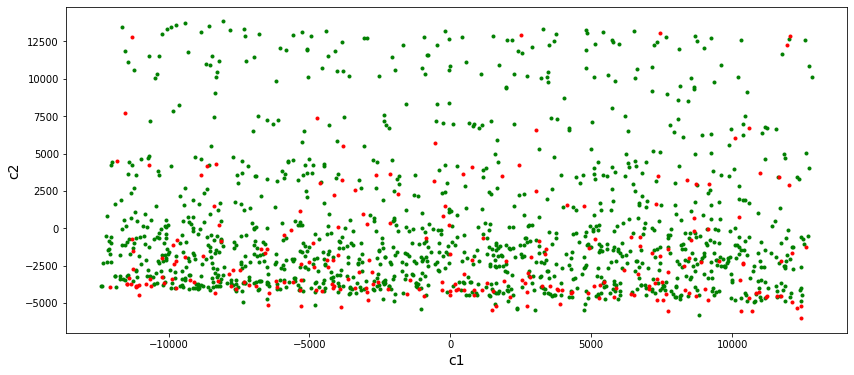

In [ ]:
plt.figure(figsize=(14, 6))
plt.scatter(df_reduce["c1"][df_reduce['Attrition'] == 'No'], df_reduce["c2"][df_reduce['Attrition'] == 'No'], c="g", marker=".")
plt.scatter(df_reduce["c1"][df_reduce['Attrition'] == 'Yes'], df_reduce["c2"][df_reduce['Attrition'] == 'Yes'],c="r", marker=".")
plt.xlabel("c1", fontsize=14)
plt.ylabel("c2", fontsize=14)
plt.show()

# Preparación de DS

## Checkpoint

In [ ]:
df_pr = df_t.copy()

## División del DS

In [ ]:
train_set, val_set, test_set = train_val_test_split(df_pr)

In [ ]:
print(f"Longitud del Training Set: {len(train_set)}")
print(f"Longitud del Validation Set: {len(val_set)}")
print(f"Longitud del test Set: {len(test_set)}")

Longitud del Training Set: 882
Longitud del Validation Set: 294
Longitud del test Set: 294


## Separación de Labels

In [ ]:
X_train, y_train = remove_labels(train_set, 'Attrition')
X_val, y_val = remove_labels(val_set, 'Attrition')
X_test, y_test = remove_labels(test_set, 'Attrition')

# Búsqueda de Modelo
Se decide usar modelos de ML por la cantidad de ejemplares con los que se cuenta.

In [ ]:
n_modelos = [
    "Linear SVM",
    "RMV SVM",
    "Poly SVM",
    "Random Forest 8",
    "KNN 15",
    "Bernoulli",
    "Gaussian"
]

modelos = [
    SVC(kernel="linear"),
    SVC(kernel="rbf"),
    SVC(kernel="poly"),
    RandomForestClassifier(max_depth=8, n_estimators=10),
    KNeighborsClassifier(15),
    BernoulliNB(),
    GaussianNB()
]

In [ ]:
for indice, clf in enumerate(modelos):
  # ======= TRAIN =======
  clf.fit(X_train, y_train.values.ravel())
  print(n_modelos[indice])
  # ==== VALIDATION ====
  y_val_pred = clf.predict(X_val)
  f1_val = f1_score(y_val, y_val_pred, pos_label='No')
  print("F1 Validation Set: ", f1_val)
  # ======= TEST =======
  y_test_pred = clf.predict(X_test)
  f1_test = f1_score(y_test, y_test_pred, pos_label='No')
  print("F1 Test Set: ", f1_test)
  # ======= FIT ========
  print("FIT:", f1_val - f1_test)
  print("\n==========\n")

Linear SVM
F1 Validation Set:  0.9305816135084428
F1 Test Set:  0.9227871939736346
FIT: 0.007794419534808195


RMV SVM
F1 Validation Set:  0.9309090909090908
F1 Test Set:  0.9211009174311926
FIT: 0.009808173477898197


Poly SVM
F1 Validation Set:  0.9309090909090908
F1 Test Set:  0.9211009174311926
FIT: 0.009808173477898197


Random Forest 8
F1 Validation Set:  0.9316081330868761
F1 Test Set:  0.9305816135084428
FIT: 0.0010265195784332493


KNN 15
F1 Validation Set:  0.9306569343065694
F1 Test Set:  0.9168207024029575
FIT: 0.013836231903611829


Bernoulli
F1 Validation Set:  0.920696324951644
F1 Test Set:  0.884920634920635
FIT: 0.035775690031009


Gaussian
F1 Validation Set:  0.8810020876826723
F1 Test Set:  0.8436830835117773
FIT: 0.037319004170894954




## Resultado
Se toma la decisión de un modelo Random Forest por tener la menor discrepancia entre su resultado F1 score con las predicciones de val_set (0.927) y test_set (0.921). 

# Modelo

## Entrenamiento y Ajuste de Hiperparametros

In [ ]:
param_rmd = {
        'n_estimators': randint(low=1, high=200),
        'max_depth': randint(low=8, high=50),
    }

rnd_clf = RandomForestClassifier(n_jobs=-1)

rnd_search = RandomizedSearchCV(rnd_clf, param_distributions=param_rmd,
                                n_iter=50, cv=2, scoring='f1')

rnd_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1131, in f1_score
    zero_division=zero_division,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1270, in fbeta_score
    zero_division=zero_division,
  File "/usr/local/lib/py

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1), n_iter=50,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1d58fa1690>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1d6069d650>},
                   scoring='f1')

In [ ]:
clf_rnd = rnd_search.best_estimator_

## Parametros del Modelo

In [ ]:
rnd_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 38,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 192,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Puntuación

### Precisión con Validation Set

In [ ]:
y_val_pred = clf_rnd.predict(X_val)
print("F1 score Validation Set:", f1_score(y_val_pred, y_val, pos_label='No'))

F1 score Validation Set: 0.9372693726937269


### Precisión con Test Set

In [ ]:
y_test_pred = clf_rnd.predict(X_test)
print("F1 score Test Set: ", f1_score(y_test_pred, y_test, pos_label="No"))

F1 score Test Set:  0.9259259259259259


# Modelo Final
Para poner el modelo en producción se usaran las caracteristicas más importantes.

## Caracteristicas Relevantes

In [ ]:
f_import = clf_rnd.feature_importances_
f_import

array([0.05838341, 0.05004099, 0.04383517, 0.02000339, 0.02440487,
       0.04720488, 0.02210385, 0.01931822, 0.02376161, 0.07160338,
       0.04923925, 0.0384196 , 0.03390342, 0.0048113 , 0.02529028,
       0.        , 0.03258028, 0.05083119, 0.0280784 , 0.01590636,
       0.04113701, 0.02991529, 0.02405965, 0.03476819, 0.01222932,
       0.0078672 , 0.01015682, 0.0087062 , 0.00836589, 0.00788202,
       0.00942561, 0.00449569, 0.00978593, 0.00972729, 0.00380407,
       0.00866692, 0.0014226 , 0.00285636, 0.00104042, 0.0070022 ,
       0.00642812, 0.00955604, 0.0079593 , 0.0228292 , 0.05019283])

In [ ]:
ls_f_import = {name: score for name, score in zip(list(X_df), f_import)}
ls_f_import_sort = pd.Series(ls_f_import).sort_values(ascending=False)
ls_f_import_sort.head(10)

MonthlyIncome         0.071603
Age                   0.058383
TotalWorkingYears     0.050831
OverTime_Yes          0.050193
DailyRate             0.050041
MonthlyRate           0.049239
HourlyRate            0.047205
DistanceFromHome      0.043835
YearsAtCompany        0.041137
NumCompaniesWorked    0.038420
dtype: float64

## DS con Caracteristicas Relevantes

In [ ]:
columns = list(ls_f_import_sort.head(10).index)

In [ ]:
X_train_reduce = X_train[columns].copy()
X_val_reduce = X_val[columns].copy()
X_test_reduce = X_test[columns].copy()

In [ ]:
X_train_reduce.describe()

,MonthlyIncome,Age,TotalWorkingYears,OverTime_Yes,DailyRate,MonthlyRate,HourlyRate,DistanceFromHome,YearsAtCompany,NumCompaniesWorked
count,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,6329.891156,36.975057,11.081633,0.291383,794.776644,14209.278912,67.263039,9.465986,6.843537,2.639456
std,4775.063995,9.405088,7.940051,0.454657,410.182669,7040.926783,20.267143,8.190654,6.057463,2.491608
min,1091.000000,18.000000,0.000000,0.000000,103.000000,2094.000000,30.000000,1.000000,0.000000,0.000000
25%,2787.000000,30.000000,6.000000,0.000000,447.250000,8047.000000,50.000000,2.000000,3.000000,1.000000
50%,4579.000000,36.000000,9.000000,0.000000,764.500000,14201.000000,68.000000,7.000000,5.000000,1.000000
75%,8150.750000,43.000000,15.000000,1.000000,1161.000000,20337.250000,85.000000,14.750000,9.000000,4.000000
max,19999.000000,60.000000,40.000000,1.000000,1496.000000,26997.000000,100.000000,29.000000,37.000000,9.000000


## Entrenamiento y Ajuste de Hiperparametros

In [ ]:
param_rmd = {
        'n_estimators': randint(low=1, high=200),
        'max_depth': randint(low=8, high=50),
    }

rnd_clf_final = RandomForestClassifier(n_jobs=-1)

rnd_search_final = RandomizedSearchCV(rnd_clf_final, param_distributions=param_rmd,
                                n_iter=50, cv=2, scoring='f1')

rnd_search_final.fit(X_train_reduce, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1131, in f1_score
    zero_division=zero_division,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1270, in fbeta_score
    zero_division=zero_division,
  File "/usr/local/lib/py

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1), n_iter=50,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1d58409c10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1d584090d0>},
                   scoring='f1')

In [ ]:
model = rnd_search_final.best_estimator_

### Parametros de Modelo

In [ ]:
rnd_search_final.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 146,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Puntuación

### Precisión con Validation Set

In [ ]:
y_val_pred_model = model.predict(X_val_reduce)
print("F1 score Validation Set:", f1_score(y_val_pred_model, y_val, pos_label='No'))

F1 score Validation Set: 0.931098696461825


### Precisión con Test Set

In [ ]:
y_test_pred_model = model.predict(X_test_reduce)
print("F1 score Validation Set:", f1_score(y_test_pred_model, y_test, pos_label='No'))

F1 score Validation Set: 0.9152542372881356


# Exportaciones

## Exportar Modelo

In [ ]:
dump(model, "model_hr.joblib")

['model_hr.joblib']

### Test del Modelo

In [ ]:
modelo = load('model_hr.joblib')

In [ ]:
y_modelo_pred = modelo.predict(X_test_reduce)

In [ ]:
print('F1 score: ', f1_score(y_modelo_pred, y_test, pos_label='No'))

F1 score:  0.9152542372881356


## Exportar DS

In [ ]:
# Caracteristicas
X_train_reduce.to_csv('X_train.csv', index=False)
X_val_reduce.to_csv('X_val.csv', index=False)
X_test_reduce.to_csv('X_test.csv', index=False)
# Etiquetas
y_train.to_csv('y_train.csv', index=False)
y_val.to_csv('y_val.csv', index=False)
y_test.to_csv('y_test.csv', index=False)